In [1]:
import keras
keras.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.4.3'

Vamos agora dar uma olhada em um primeiro exemplo concreto de uma rede neural, que faz uso da biblioteca Keras para aprender a classificar dígitos escritos à mão. 

O problema que estamos tentando resolver aqui é classificar imagens em tons de cinza de dígitos escritos à mão (28 pixels por 28 pixels), em seus 10 categorias (0 a 9). O conjunto de dados que usaremos é o conjunto de dados MNIST, um conjunto de dados clássico na comunidade de aprendizado de máquina, que tem sido por quase tanto tempo quanto o próprio campo e tem sido muito intensamente estudado. É um conjunto de 60.000 imagens de treinamento, mais 10.000 de teste imagens, reunidas pelo Instituto Nacional de Padrões e Tecnologia (o NIST no MNIST) na década de 1980. 

https://en.wikipedia.org/wiki/MNIST_database

O conjunto de dados MNIST vem pré-carregado no Keras, na forma de um conjunto de quatro matrizes Numpy:

In [31]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from matplotlib import pyplot

for i in range(9):
    # define subplot
    pyplot.subplot(331 + i)
    # plota dados de pixel brutos
    pyplot.imshow(test_images[i], cmap=pyplot.get_cmap('gray'))

# mostra a figura
pyplot.show()

<Figure size 640x480 with 9 Axes>

Classe 7


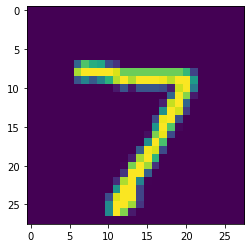

Classe 2


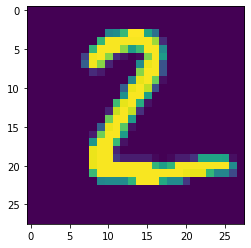

Classe 1


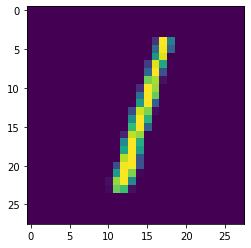

Classe 0


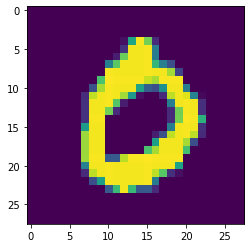

Classe 4


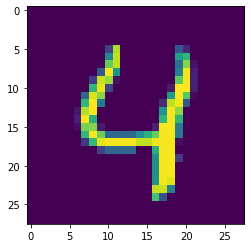

Classe 1


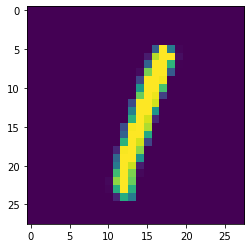

Classe 4


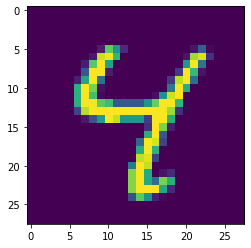

Classe 9


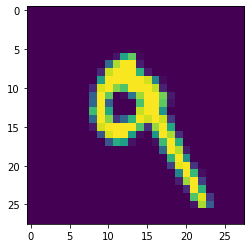

Classe 5


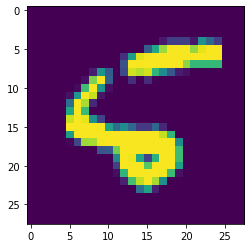

In [4]:
from matplotlib import pyplot

for i in range(9):
    print("Classe " + str(test_labels[i]))
    pyplot.imshow(test_images[i])
    pyplot.show()

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

`train_images` e` train_labels` formam o "conjunto de treinamento", os dados que o modelo aprenderá. O modelo será então testado no "test set", `test_images` e` test_labels`. Nossas imagens são codificadas como matrizes Numpy, e os rótulos são simplesmente uma matriz de dígitos, variando de 0 a 9. Há uma correspondência um a um entre as imagens e os rótulos.

Vamos dar uma olhada nos dados de treinamento:

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Vamos dar uma olhada nos dados de teste:

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Nosso fluxo de trabalho será o seguinte: primeiro apresentaremos nossa rede neural com os dados de treinamento, `train_images` e` train_labels`. A rede aprenderá a associar imagens e rótulos. Finalmente, pediremos à rede para produzir previsões para `test_images`, e nós iremos verificar se essas previsões correspondem aos rótulos de `test_labels`.


In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

O bloco de construção central das redes neurais é a "camada", um módulo de processamento de dados que você pode conceber como um "filtro" de dados. Alguns dados entram e saem de uma forma mais útil. Precisamente, as camadas extraem _representações_ dos dados inseridos nelas - espero representações que são mais significativas para o problema em questão. A maior parte do aprendizado profundo realmente consiste em encadear camadas simples. Um modelo de aprendizado profundo é como uma peneira para processamento de dados, feita de um  sucessão de filtros de dados cada vez mais refinados - as "camadas".

Aqui, nossa rede consiste em uma sequência de duas camadas `Densa`, que são camadas neurais densamente conectadas (também chamadas de" totalmente conectadas ").

A segunda (e última) camada é uma camada "softmax" de 10 vias, o que significa que ela retornará uma matriz de 10 pontuações de probabilidade (somando 1). Cada pontuação será a probabilidade de que a imagem do dígito atual pertença a uma de nossas classes de 10 dígitos.

Para preparar nossa rede para o treinamento, precisamos escolher mais três coisas, como parte da etapa de "compilação":

* Uma função de perda: é como a rede será capaz de medir o quão bom está fazendo um trabalho em seus dados de treinamento e, portanto, como será capaz de se orientar na direção certa.
* Um otimizador: é o mecanismo pelo qual a rede se atualiza com base nos dados que vê e em sua função de perda.
* Métricas para monitorar durante o treinamento e teste. Aqui, nos preocuparemos apenas com a precisão (a fração das imagens que foram corretamente classificado).


In [13]:
# https://keras.io/api/optimizers/rmsprop/
# http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf
    
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
print(train_labels[1])
train_images[1]

0


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Antes do treinamento, iremos pré-processar nossos dados, remodelando-os para a forma que a rede espera e escalando-os para que todos os valores estejam no intervalo `[0, 1]`. Anteriormente, nossas imagens de treinamento, por exemplo, eram armazenadas em uma matriz de formato `(60000, 28, 28)` do tipo `uint8` com valores no intervalo `[0, 255]`. Nós o transformamos em uma matriz `float32` de forma` (60000, 28 * 28) `com valores entre 0 e 1.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
train_images.shape

(60000, 784)

In [18]:
test_images.shape

(10000, 784)

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Também precisamos codificar categoricamente os rótulos:

In [21]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Agora estamos prontos para treinar nossa rede, o que em Keras é feito por meio de uma chamada ao método `fit` da rede:
"ajustamos" o modelo aos dados de treinamento.

In [24]:
historico_epocas = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2615 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9883


In [25]:
historico_epocas.history.keys()

dict_keys(['loss', 'accuracy'])

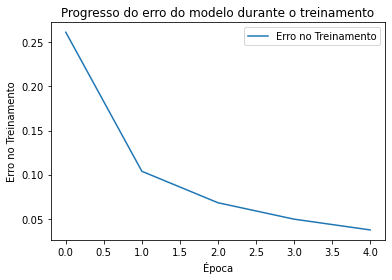

In [26]:
import matplotlib.pyplot as plt
plt.plot(historico_epocas.history['loss'])
plt.title('Progresso do erro do modelo durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Erro no Treinamento')
plt.legend(['Erro no Treinamento']);

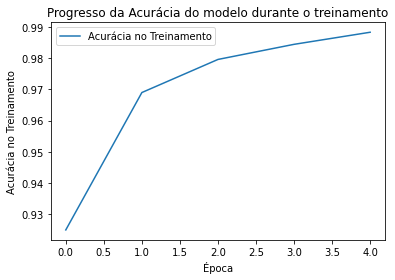

In [27]:
import matplotlib.pyplot as plt
plt.plot(historico_epocas.history['accuracy'])
plt.title('Progresso da Acurácia do modelo durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia no Treinamento')
plt.legend(['Acurácia no Treinamento']);

Duas quantidades estão sendo exibidas durante o treinamento: a "perda" da rede sobre os dados de treinamento e a precisão da rede sobre os dados de treinamento.

Alcançamos rapidamente uma precisão de 0,989 (ou seja, 98,9%) nos dados de treinamento. Agora vamos verificar se nosso modelo tem um bom desempenho no conjunto de teste também:

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 920us/step - loss: 0.0658 - accuracy: 0.9794


In [29]:
print('test_acc:', test_acc)

test_acc: 0.9793999791145325


A precisão do nosso conjunto de teste é 97,8% - um pouco mais baixa do que a precisão do conjunto de treinamento.
Esta lacuna entre a precisão do treinamento e a precisão do teste é um exemplo de "overfitting" o fato de que os modelos de aprendizado de máquina tendem a ter um desempenho pior em novos dados do que em seus dados de treinamento.

Isso conclui nosso primeiro exemplo - você acabou de ver como poderíamos construir e treinar uma rede neural para classificar dígitos manuscritos, em menos de 20 linhas de código Python. 